## Content
- Quizzes

- **Reshape with -ve index**



- **Matrix Multiplication**
    - `matmul()`, `@`, `dot()`



- **Vectorization**
    - `np.vectorize()`



- **3D arrays**
    




In [ ]:
import numpy as np

## Reshape in 2D array

#### We saw reshape and flatten. What if i want to convert a matrix to 1D array using `reshape()`
#### Question: What should I pass in `A.reshape()` if I want to use it to convert `A` to 1D vector?

- **(1, 1)?** - **NO**


- It means we only have a single element


- But **we don't have a single element**

In [ ]:
A = np.arange(12).reshape(3,4)

In [ ]:
A.reshape(1, 1)

ValueError: ignored

- So, **(1, 12)?** - **NO**


- It will **still remain a 2D Matrix with dimensions $1\times12$**

In [ ]:
A.reshape(1, 12)

array([[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]])

- **Correct answer is (12)**


- We need a vector of dimension (12,)


- So we need to pass only 1 dimension in `reshape()`

In [ ]:
A.reshape(12)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

#### So, Be careful while using `reshape()` to convert a Matrix into a 1D vector

#### What will happen if we pass a negative integer in `reshape()`?

In [ ]:
A.reshape(6, -1)

array([[ 0,  1],
       [ 2,  3],
       [ 4,  5],
       [ 6,  7],
       [ 8,  9],
       [10, 11]])

#### Surprisingly, it did not give an error

- It is able to **figure out on its own** what should be the **value in-place of negative integer**


- Since **no. of elements in our matrix is 12**


- And **we passed 6 as no. of rows**


- It is **able to figure out** that **no. of columns should be 2**


**Same thing happens with this:**

In [ ]:
A.reshape(-1, 6)

array([[ 0,  1,  2,  3,  4,  5],
       [ 6,  7,  8,  9, 10, 11]])

## Matrix multiplication

#### Question: What will be output of following?

In [ ]:
a = np.arange(5)
b = np.ones(5) * 2

In [ ]:
a * b

array([0., 2., 4., 6., 8.])

Recall that, if a and b are 1D, * operation will perform elementwise multiplication


#### Lets try * with 2D arrays

In [ ]:
A = np.arange(12).reshape(3, 4)
A

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [ ]:
B = np.arange(12).reshape(3, 4)
B

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [ ]:
A * B

array([[  0,   1,   4,   9],
       [ 16,  25,  36,  49],
       [ 64,  81, 100, 121]])

**Again did element-wise multiplication**

#### For actual Matrix Multiplication, We have a different method/operator

`np.matmul()`




#### What is the requirement of dimensions of 2 matrices for Matrix Multiplication?

- **Columns of A = Rows of B** (A **Must condition** for Matric Multiplication)


- **If A is $3\times4$, B can be $4\times3$**... or $4\times(Something Else)$

#### So, lets reshape B to $4\times3$ instead

In [ ]:
B = B.reshape(4, 3)
B

array([[ 0,  1,  2],
       [ 3,  4,  5],
       [ 6,  7,  8],
       [ 9, 10, 11]])

In [ ]:
np.matmul(A, B)

array([[ 42,  48,  54],
       [114, 136, 158],
       [186, 224, 262]])

- **We are getting a $3\times3$ matrix as output**

- So, this is doing Matrix Multiplication

#### There's a direct operator as well for Matrix Multiplication
`@`

In [ ]:
A @ B

array([[ 42,  48,  54],
       [114, 136, 158],
       [186, 224, 262]])

#### Question: What will be the dimensions of Matrix Multiplication `B @ A`?

- $4\times4$

In [ ]:
B @ A

array([[ 20,  23,  26,  29],
       [ 56,  68,  80,  92],
       [ 92, 113, 134, 155],
       [128, 158, 188, 218]])

#### There is another method in np for doing Matrix Multiplication


In [ ]:
np.dot(A, B)

array([[ 42,  48,  54],
       [114, 136, 158],
       [186, 224, 262]])

**Other cases of `np.dot()`**
- It performs dot product when both inputs are 1D array
- It performs multiplication when both input are scalers.


In [ ]:
a= np.array([1,2,3])
b = np.array([1,1,1])


In [ ]:
np.dot(a,b) # 1*1 + 2*1 + 3*1 = 6

6

In [ ]:
np.dot(4,5)

20

#### Now, Let's try multiplication of a mix of matrices and vectors



In [ ]:
A = np.arange(12).reshape(3, 4)  # A is a 3x4 Matrix
A

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [ ]:
a = np.array([1, 2, 3])  # a although a (3,) can be thought of as row vector
print(a.shape)

(3,)


In [ ]:
np.matmul(A, a)

ValueError: ignored

**Columns of `A` $\neq$ Rows of `a`**

Lets try revervse

In [ ]:
np.matmul(a, A)

array([32, 38, 44, 50])

YES, **Columns of `a` (3) = Rows of `A` (3)**

## Vectorization

- We have already seen vectorization some time ago

#### Remember doing scaler operations on np arrays?

`A * 2`

#### That's vectorization

- Replacing explicit loops with array expressions is commonly referred to as vectorization.

- Vectorization helps us to **perform operations directly on Arrays instead of scaler**.

- Operation gets performed on each element of np array

#### Revisiting the example:

In [ ]:
A = np.arange(10)

In [ ]:
A * 2

array([ 0,  2,  4,  6,  8, 10, 12, 14, 16, 18])

#### `np.vectorize()`

- `np.vectorize()` defines a **vectorized function**


- It **takes numpy arrays as inputs** and **returns a single numpy array or a tuple of numpy arrays**.


- The vectorized function **evaluates element by element of the input arrays** like the python `map` function


#### Let's plot graph for `y = log(x)` (Log function) using` np.vectorize()`

- We will pass in a numpy array, as **it can then take a vector/array/list as input**


- It will **return the vectorized form of `math.log()` function**

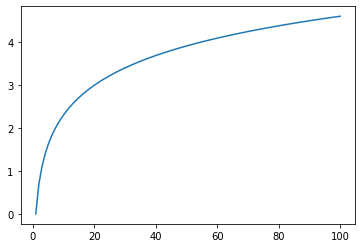

In [ ]:
import math
import matplotlib.pyplot as plt

x = np.arange(1, 101)

y = np.vectorize(math.log)(x)

plt.plot(x, y)
plt.show()

In [ ]:
y

array([0.        , 0.69314718, 1.09861229, 1.38629436, 1.60943791,
       1.79175947, 1.94591015, 2.07944154, 2.19722458, 2.30258509,
       2.39789527, 2.48490665, 2.56494936, 2.63905733, 2.7080502 ,
       2.77258872, 2.83321334, 2.89037176, 2.94443898, 2.99573227,
       3.04452244, 3.09104245, 3.13549422, 3.17805383, 3.21887582,
       3.25809654, 3.29583687, 3.33220451, 3.36729583, 3.40119738,
       3.4339872 , 3.4657359 , 3.49650756, 3.52636052, 3.55534806,
       3.58351894, 3.61091791, 3.63758616, 3.66356165, 3.68887945,
       3.71357207, 3.73766962, 3.76120012, 3.78418963, 3.80666249,
       3.8286414 , 3.8501476 , 3.87120101, 3.8918203 , 3.91202301,
       3.93182563, 3.95124372, 3.97029191, 3.98898405, 4.00733319,
       4.02535169, 4.04305127, 4.06044301, 4.07753744, 4.09434456,
       4.11087386, 4.12713439, 4.14313473, 4.15888308, 4.17438727,
       4.18965474, 4.20469262, 4.21950771, 4.2341065 , 4.24849524,
       4.26267988, 4.27666612, 4.29045944, 4.30406509, 4.31748

## 3 Dimensional Arrays

### Vectors, Matrix and Tensors

1. **Vector** ---> **1-Dimensional** Array
2. **Matrix** ---> **2-Dimensional** Array
3. **Tensor** ---> **3 and above Dimensional** Array


#### `Tensor` is a general term we use

- Tensor can also be less than 3D


- **2D Tensor** is called a **Matrix**
- **1D Tensor** is called a **Vector**

In [ ]:
B = np.arange(24).reshape(2, 3, 4)
B

array([[[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]],

       [[12, 13, 14, 15],
        [16, 17, 18, 19],
        [20, 21, 22, 23]]])

#### Now, What is happening here?

#### Question: How many dimensions `B` has?
- 3


- It's a **3-dimensional tensor**


#### How is `reshape(2, 3, 4)` working?

- If you see, it is giving 2 matrices


- Each matrix has 3 rows and 4 columns


#### So, that's how reshape() is interpreted for 3D

- **1st argument** gives **depth** (No. of Matrices)


- **2nd agrument** gives **no. of rows** in each depth


- **3rd agrument** gives **no. of columns** in each depth


#### How can I get just the whole of 1st Matrix?

In [ ]:
B[0]

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

#### Question: What value will I get if I do `B[0, 0, 0]`?

In [ ]:
B[0, 0, 0]

0

In [ ]:
#### Question: What value will I get if I do `B[1, 1, 1]`?
B[1, 1, 1]

# It looks at Matrix 1, that is, 2nd Matrix (Not Matrix 0)
# Then it looks at row 1 of matrix 1
# Then it looks at column 1 of row 1 of matrix 1

17

#### We can also Slicing in 3-Dimensions

- Works same as in 2-D matrices